# Matplotlib

The following imports numpy.  Do similar imports for matplotlib.pyplot and pandas:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

We're going to generate some plots of fictitious data that follow this equation:

$$ y(x) = 4 + 2x - x^2 + 0.075x^3 $$

The following cell generates our `x` and `y` arrays.

In [5]:
x = np.linspace(0, 10, 50)
y = 4 + 2*x - x**2 + 0.075*x**3

Use the matplotlib.pyplot module to make a plot of `y` against `x` (y vertically, x horizontally):

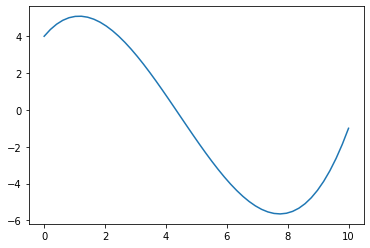

In [17]:
plt.plot(x,y)
plt.show()

(Check your ranges in the plot to make sure that `x` values are plotted horizontally and `y` values are plotted vertically.)

Real data is usually noisy.  It may be noise from measurement, or "noise" in the sense that there are aspects of the data that aren't captured by the features that we measure.

The following cell introduces some random noise into a new variable `y_with_noise` that equals `y + noise`

In [20]:
# generate 50 points from a normal 
# distribution that has mean = 0 and std dev = 1.5
noise = np.random.normal(0,1.5,50)

# this y is now the theoretical value + noise
y_with_noise = 4 + 2*x - x**2 + 0.075*x**3 + noise

Make a plot of y_with_noise against x:

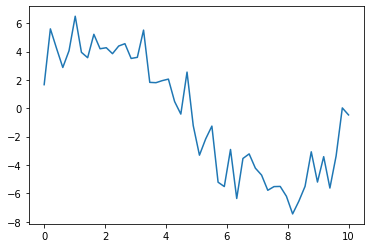

In [22]:
plt.plot(x,y_with_noise)
plt.show()

Make a figure that includes
* scatter plot of y_with_noise against x
* line plot of y against x

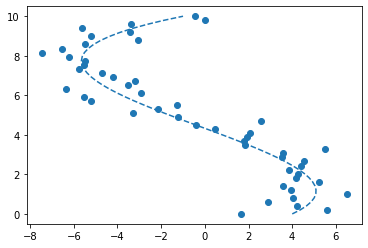

In [54]:
plt.scatter(y_with_noise,x)
plt.plot(y,x,linestyle='--')
plt.show()

Make the same plot again with:
* labels for the x-axis and y-axis
* a title
* 16-pt font size for the labels and title
* make the line blue
* make the scatter points black

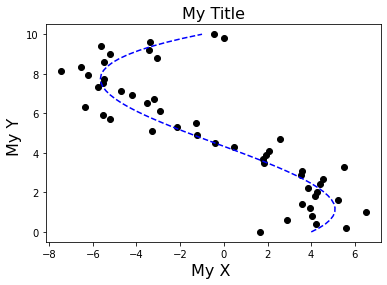

In [66]:
plt.scatter(y_with_noise,x, color='black')
plt.plot(y,x,linestyle='--', color='blue')
plt.xlabel('My X ', fontsize=16)
plt.ylabel('My Y ', fontsize=16)
plt.title('My Title',fontsize=16)
plt.show()

Save the figure into a file named 'matplotlib-plot.png':

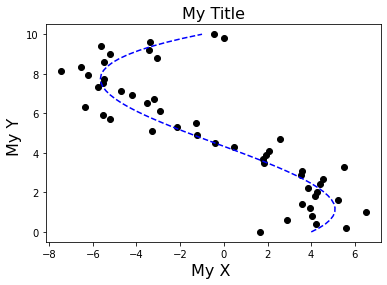

In [67]:
plt.scatter(y_with_noise,x, color='black')
plt.plot(y,x,linestyle='--', color='blue')
plt.xlabel('My X ', fontsize=16)
plt.ylabel('My Y ', fontsize=16)
plt.title('My Title',fontsize=16)
plt.savefig('matplotlib-plot.png')

Generate the same plot using the figure and axes objects (you can use the matplotlib.pyplot module to generate the figure, but otherwise don't use matplotlib.pyplot.)

* The documentation for matplotlib.axes -> https://matplotlib.org/stable/api/axes_api.html
* The documentation for matplotlib.figure -> https://matplotlib.org/stable/api/figure_api.html

Save the figure into the file 'figure-plot.png'

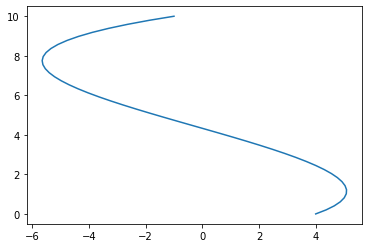

<Figure size 432x288 with 0 Axes>

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x)
plt.show()
plt.savefig('figure-plot.png')

# Pandas

Use pandas to import the data from 'anscombe.csv' into a dataframe variable

In [139]:
import pandas as pd
from sklearn.linear_model import LinearRegression

impdata = pd.read_csv('anscombe.csv')

Print the first 2 rows of the dataframe:

In [140]:
impdata.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


Print the last 2 rows of the dataframe:

In [141]:
impdata.tail(2)

,dataset,x,y
42,IV,8.0,7.91
43,IV,8.0,6.89


Print the number of rows and columns of the dataframe:

In [142]:
impdata
impdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


Print the column names of the dataframe:

In [143]:
impdata.columns

Index(['dataset', 'x', 'y'], dtype='object')

Print the datatypes of each column:

In [144]:
impdata.dtypes

dataset     object
x          float64
y          float64
dtype: object

Print summary statistics about the dataframe:

In [145]:
impdata.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


Print the values that are in the 'dataset' column:

In [146]:
impdata['dataset']

0       I
1       I
2       I
3       I
4       I
5       I
6       I
7       I
8       I
9       I
10      I
11     II
12     II
13     II
14     II
15     II
16     II
17     II
18     II
19     II
20     II
21     II
22    III
23    III
24    III
25    III
26    III
27    III
28    III
29    III
30    III
31    III
32    III
33     IV
34     IV
35     IV
36     IV
37     IV
38     IV
39     IV
40     IV
41     IV
42     IV
43     IV
Name: dataset, dtype: object

Use "loc" to print the first 10 rows:

In [147]:
impdata.loc[[0,1,2,3,4,5,6,7,8,9]]

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Use "loc" to print the values from the first 10 rows of the 'x' column:

In [148]:
impdata.loc[[0,1,2,3,4,5,6,7,8,9], ['x']]

,x
0,10.0
1,8.0
2,13.0
3,9.0
4,11.0
5,14.0
6,6.0
7,4.0
8,12.0
9,7.0


Use "loc" to print the rows for which `dataset` is equal to `III`:

In [149]:
impdata.loc[impdata['dataset'] == 'III']

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


Make a line plot of y against x for dataset III:

<AxesSubplot:xlabel='x'>

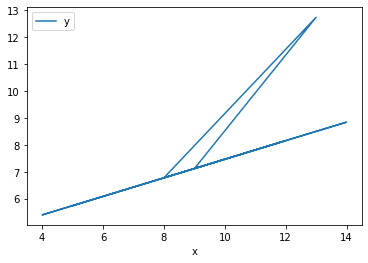

In [150]:
III = impdata[impdata['dataset'] == 'III']
III.plot(y='y',x='x')

Make a scatter plot of y against x for dataset III:

<AxesSubplot:xlabel='x', ylabel='y'>

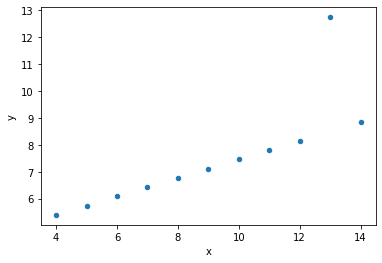

In [151]:
III.plot.scatter(y='y',x='x')

Make scatter plots for the other 3 datasets:

<AxesSubplot:xlabel='x', ylabel='y'>

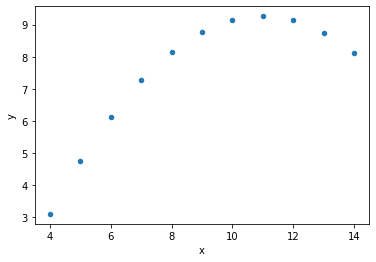

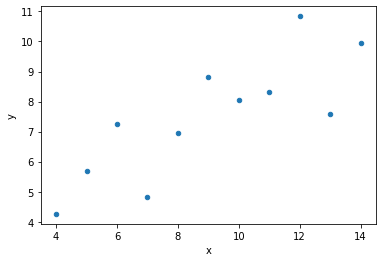

In [152]:
II = impdata[impdata['dataset'] == 'II']
II.plot.scatter(y='y',x='x')

I = impdata[impdata['dataset'] == 'I']
I.plot.scatter(y='y',x='x')

We're working with the datasets from Anscombe's quartet.  You can read about it [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

Use that page to find the equation for the linear regression line of these datasets, and make a figure that includes:
* a scatter plot of dataset I 
* a line plot of the linear regression line

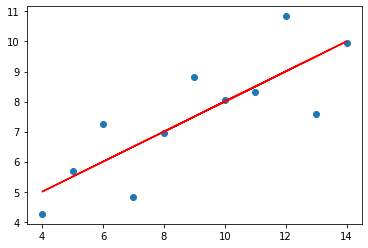

In [164]:
X = I['x'].values.reshape(-1, 1)
Y = I['y'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Make the same plot again with:
* a title
* 16-pt font size for the labels and title
* make the line blue
* make the scatter points black
* save the figure into a file called 'anscombe-I.png'

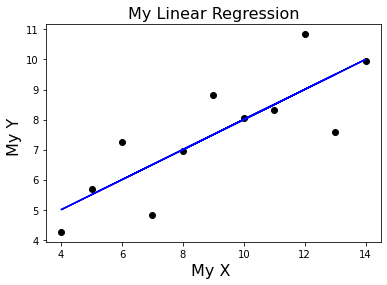

<Figure size 432x288 with 0 Axes>

In [165]:
X = I['x'].values.reshape(-1, 1)
Y = I['y'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, color='black')
plt.plot(X, Y_pred, color='blue')
plt.title('My Linear Regression',fontsize=16)
plt.xlabel('My X ', fontsize=16)
plt.ylabel('My Y ', fontsize=16)
plt.show()
plt.savefig('anscombe-I.png')

# End